Graded Project
Web Development using Flask
Domain:
○ Finance and Banking.
Context:
Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customers first apply for a home
loan after that company manually validates the customer eligibility for loan.
Company wants to automate the loan eligibility process based on customer
detail provided while filling the details online.
They need a web application where a user can access their website and
register, login, and enter the required details such as Gender, Marital Status,
Education, Number of Dependents, Income, Loan Amount, Credit History and
others for checking the eligibility for the home loan.
Project Objective:
1) This is a standard supervised classification task. A classification problem
where we have to predict whether a customer is eligible for loan or not based on
a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by
entering the username and password and login to the website and then enter
their details to check whether they are eligible for loan or not.
Dataset Description:
Dataset can be found here
SL. No Attribute Description
1. Loan ID Unique Loan ID
2. Gender Male or Female
3. Married Applicant married (Y/N)
4. Dependents Number of dependents
5. Self employed Self employed (Y/N)
6. Education Graduate/Undergraduate
7. Applicant Income Applicant income (in dollars)
8. Co Applicant Income Co Applicant Income (in dollars)
9. Loan Amount Loan amount in thousands (in dollars)
10. Loan Amount Term Term of loan in months
11. Credit History Credit history meets guidelines Yes/No(1/0)
12. Property area Urban/Semi Urban/Rural
13. Loan Status (Target) Loan Approved (Y/N)##

Model Building and saving the model using Pickle
1. Import required libraries and read the dataset. (2)

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
import pickle


2. Check the first few samples, shape, info of the data and try to familiarize  yourself with different features. (2)

In [31]:
df = pd.read_csv('loan_approval_data.csv')
# Display a sample of five rows
sample = df.sample(n=5)  
# randomly select 5 rows from the DataFrame
print(sample)
# Check the shape of the data (number of rows and columns)
print("Shape of the DataFrame:")
print(df.shape)

# Check general information about the DataFrame
print("\nGeneral information about the DataFrame:")
print(df.info())

      loan_id  gender married  dependents     education self_employed  \
86   lp001280    male     yes         2.0  not graduate            no   
417  lp002342    male     yes         2.0      graduate           yes   
555  lp002792    male     yes         1.0      graduate            no   
43   lp001131    male     yes         0.0      graduate            no   
407  lp002314  female      no         0.0  not graduate            no   

     applicantincome  coapplicantincome  loanamount  loan_amount_term  \
86              3333             2000.0        99.0             360.0   
417             1600            20000.0       239.0             360.0   
555             5468             1032.0        26.0             360.0   
43              3941             2336.0       134.0             360.0   
407             2213                0.0        66.0             360.0   

     credit_history property_area loan_status  
86              NaN     semiurban           y  
417             1.0       

3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [6]:
# Check the percentage of missing values 
missing_percentages = df.isnull().mean() * 100

print("Percentage of missing values in each column:")
print(missing_percentages)

# Drop missing values
if df.isnull().values.any():
    df = df.dropna()

# Confirm 
print("\nAfter dropping missing values:")
print(df.info())

Percentage of missing values in each column:
loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

After dropping missing values:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            480 non-null    object 
 1   gender             480 non-null    object 
 2   married            480 non-null    object 
 3   dependents         480 non-null    float64
 4   education          480 non-null    object 
 5   self_employed      480 non-null    object 
 6   applicantincome    480 n

4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

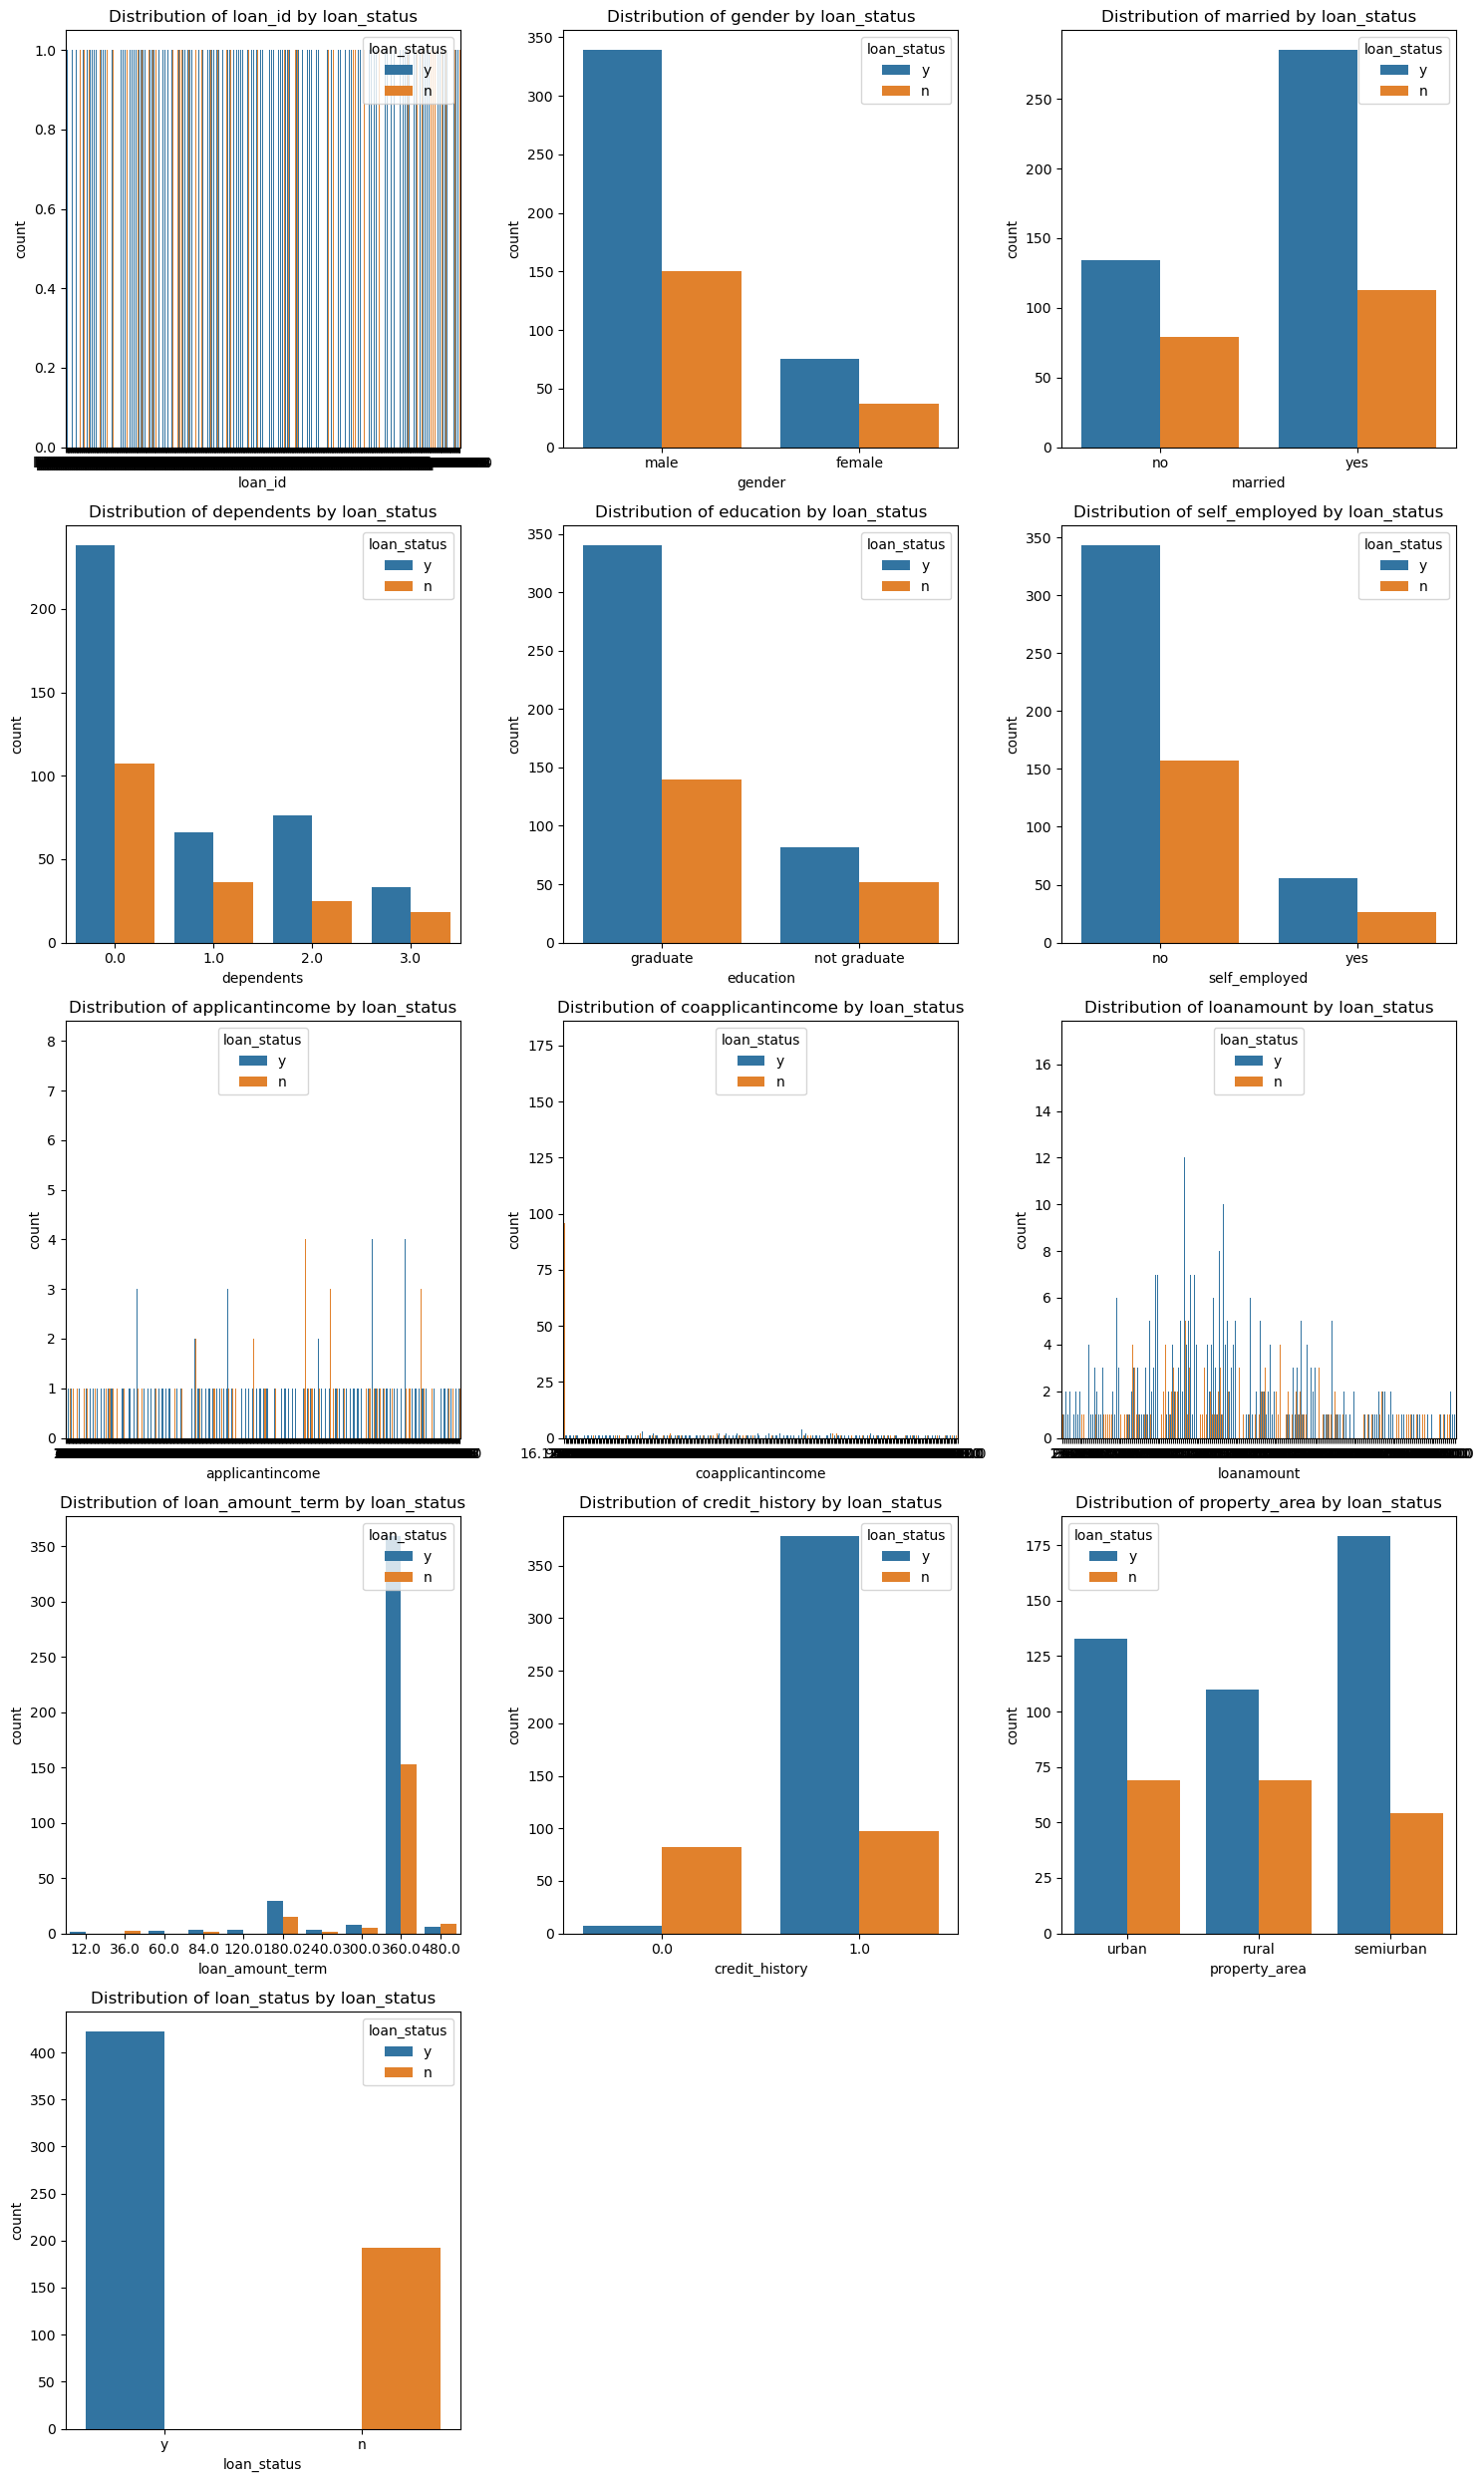

In [12]:
# Assuming you have loaded the data into a DataFrame named 'data'
file_path = 'loan_approval_data.csv'

# Load data into 'data' DataFrame
data = pd.read_csv(file_path)

# Replace 'loan_status' with the name of the target column and 'categorical_features' with a list of categorical feature names
target_column = 'loan_status'
categorical_features = ['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']  # Replace with the actual names of your categorical features

# Create subplots to visualize multiple categorical features
num_plots = len(categorical_features)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.countplot(x=feature, hue=target_column, data=data, ax=ax)
    ax.set_title(f'Distribution of {feature} by {target_column}')
    ax.legend(title=target_column)

# Hide empty subplots
for i in range(len(categorical_features), num_cols * num_rows):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [7]:

file_path = 'loan_approval_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Printing column names
print(df.columns.tolist())

['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']


5. Encode the categorical data. (2)

In [33]:

label_encoder = LabelEncoder()

# Encode the categorical column(s)
categorical_columns = ['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']  # Replace with the names of your categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


6. Separate the target and independent features and split the data into train and test. (2)

In [15]:
X = df[['loan_id','gender','married','dependents','education','self_employed','applicantincome', 'coapplicantincome', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']]
y = df['loanamount']

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing train and test data
print("Train data shape - X_train:", X_train.shape, "y_train:", y_train.shape)
print("Test data shape - X_test:", X_test.shape, "y_test:", y_test.shape)


Train data shape - X_train: (336, 12) y_train: (336,)
Test data shape - X_test: (144, 12) y_test: (144,)


7. Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [42]:

categorical_columns = ['loan_id', 'gender', 'married', 'dependents', 'education', 'self_employed', 'property_area', 'loan_status']  # Replace with the names of your categorical columns

# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)
X_encoded = df_encoded.drop(columns=[target_column_name]) 
y_encoded = df_encoded[target_column_name]

# Display 
print(df.head())

   loan_id  gender  married  dependents  education  self_employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0              376                  0         203                 8   
1              306                 60          81                 8   
2              139                  0          26                 8   
3               90                160          73                 8   
4              381                  0          94                 8   

   credit_history  property_area  loan_status  \
0               1              2            1   
1               1              0            0   
2          

In [49]:

#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

#the Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

#Model Accuracy
accuracy = classifier.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Stusing pickle
with open('loan_status_classifier.pkl', 'wb') as file:
    pickle.dump(classifier, file)


C:\Users\hpg13\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\hpg13\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Model Accuracy: 0.008130081300813009


● Python Flask Application development (35 points)
1. Creating a project and virtual environment using pycharm or visual studio code and installing the required packages (5 points).

2. app.py (30 points)
● This is our main application file that is designed to call some of the
implemented APIs and methods, such as connecting to the MYSQL
database and creating a table for the database, and APIs such as user
to register, login, enter_details, predict, and logout.

a) Connect to the MYSQL database and create the class for the table.
● User(id, username, password) (can create the table in the database using mysql workbench also)

b) Register: This is a register API. This should take username and password
and store the details in the user database.

c) Login: This API should take the username and password of registered
users and successfully log them in.

d) Enter Details: This API should render the ‘predict.html’ page, where the
user has to enter their details to check the loan eligibility.

e) Predict: This API should render the prediction results on the HTML
template.

f) Logout: This API should logout the user.

Once you run the application, it should route to the home.html page where the user has to register.
